# Análisis de Aprendizaje Supervisado para Predicción de Robos


# Fuente de los datos
> Los datos utilizados en este proyecto fueron obtenidos de la Sociedad Dominicana de Ciencia de Datos y Big Data. Los datos públicos están disponibles en el siguiente enlace:
https://bigdatado.org/download/crime-data/



# Introducción
####En este análisis, aplicamos técnicas de aprendizaje supervisado para predecir robos utilizando un dataset que contiene información temporal sobre incidentes reportados. El objetivo es construir un modelo que pueda predecir con precisión la ocurrencia de robos basándose en características derivadas de la fecha y hora del incidente.

# Importamos librerias necesarias para el análisis exploratorio

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carga y Exploración de Datos

In [80]:
df = pd.read_csv("/content/crime_data.csv")

In [81]:
df.head()

,X,Y,DATETIME,TARGET
0,-76.624824,39.252974,2018-04-02 04:00:00+00:00,ASALTO
1,-76.592225,39.343284,2019-02-01 08:00:00+00:00,HURTO
2,-76.625705,39.284369,2017-09-27 21:00:00+00:00,HURTO
3,-76.478282,39.270194,2017-03-21 11:00:00+00:00,FALSO
4,-76.576006,39.291228,2017-03-07 02:00:00+00:00,ROBO


In [82]:
df.tail()

,X,Y,DATETIME,TARGET
236365,-76.614490,39.277099,2017-01-21 11:00:00+00:00,HURTO
236366,-76.560945,38.734335,2017-10-02 18:00:00+00:00,FALSO
236367,-76.597153,39.234203,2017-08-06 11:00:00+00:00,HURTO
236368,-76.640145,39.308469,2019-01-06 12:00:00+00:00,HURTO
236369,-76.608258,39.312723,2019-07-07 11:00:00+00:00,ASALTO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179427 entries, 0 to 179426
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         179427 non-null  float64
 1   Y         179427 non-null  float64
 2   DATETIME  179427 non-null  object 
 3   TARGET    179426 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.5+ MB


# Comprobar si hay valores nulos

In [8]:
df.isnull().sum() #check for null values

X           0
Y           0
DATETIME    0
TARGET      1
dtype: int64

# Eliminar los valores nulos

In [85]:
df = df.dropna()
df.head()

df.isnull().sum().sum()

0

# Cuales son los crimenes mas frecuentes

In [86]:
df.TARGET.value_counts()

TARGET
HURTO     92440
ASALTO    69438
ROBO      51282
FALSO     23210
Name: count, dtype: int64

In [87]:
targesito = df.TARGET.value_counts().sort_values()
print("Nombre de las colm:", targesito.index)
print("Valores:",targesito.values)

Nombre de las colm: Index(['FALSO', 'ROBO', 'ASALTO', 'HURTO'], dtype='object', name='TARGET')
Valores: [23210 51282 69438 92440]


# Visualizacion de los datos

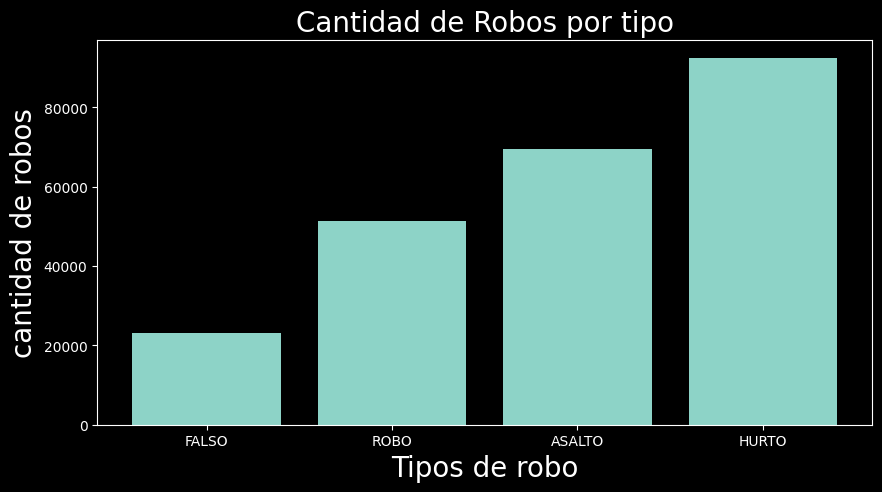

In [88]:
targesito = df.TARGET.value_counts().sort_values()
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(targesito.index, targesito.values)
ax.set_facecolor("black")
plt.style.use("dark_background")
plt.xticks(rotation = 0)
plt.xlabel("Tipos de robo", fontsize = 20)
plt.ylabel("cantidad de robos", fontsize = 20)
plt.title("Cantidad de Robos por tipo", fontsize = 20)
plt.show()

## COMO HA SIDO LAS TENDECIAS DE ROBO A LO LARGO DEL TIEMPO


### Transformación de Datos
Realizamos transformaciones a los datos 'DATATIME'

In [89]:
from datetime import datetime

In [90]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'], errors='coerce')

In [91]:
df['DAY'] = df['DATETIME'].dt.day
df['YEAR'] = df['DATETIME'].dt.year
df['HOUR'] = df['DATETIME'].dt.hour
df['MONTH'] = df['DATETIME'].dt.month
df['HOUR'] = df['DATETIME'].dt.hour
df['DAYOFWEEK'] = df['DATETIME'].dt.dayofweek

In [17]:
robos = df[df['TARGET'].isin(['ROBO', 'HURTO', 'ASALTO'])]

# Visualización de Robos por Año

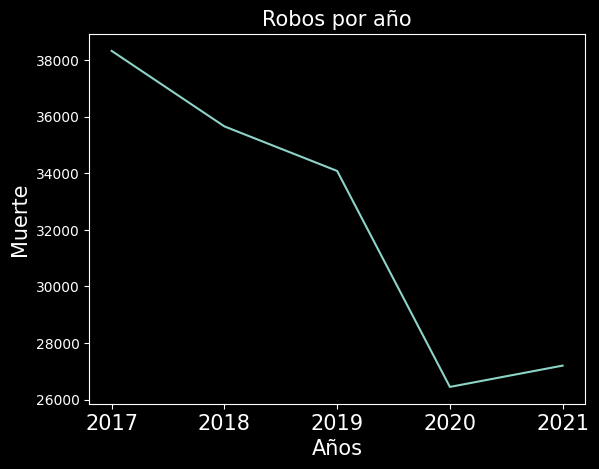

In [92]:
year_counts = robos['YEAR'].value_counts().sort_index()
#grafica
plt.plot(year_counts)
plt.style.use("dark_background")
plt.xticks(year_counts.index, fontsize= 15)
plt.xlabel('Años', fontsize = 15)
plt.ylabel('Muerte', fontsize= 15)
plt.title('Robos por año', fontsize= 15)
plt.show()

In [93]:
print('Numeros')
print(robos['YEAR'].value_counts())
print('Shape',robos['YEAR'].shape)

Numeros
YEAR
2017.0    38323
2018.0    35656
2019.0    34082
2021.0    27204
2020.0    26451
Name: count, dtype: int64
Shape (161716,)


**Análisis de la Tendencia de Criminalidad**


---


>La gráfica de serie de tiempo revela una tendencia significativa en la incidencia delictiva a lo largo de los años analizados. Desde 2017 hasta 2021, se observa una notable disminución en el número de delitos reportados, reflejando una tendencia a la baja en la criminalidad.

>En el año 2017, se registraron 50,556 delitos, cifra que se redujo a 47,062 en 2018 y a 45,009 en 2019. Sin embargo, el año 2020 marcó un punto destacado con tan solo 34,794 delitos reportados, marcando un mínimo durante el periodo estudiado. Este descenso pronunciado podría atribuirse en gran medida a la pandemia de COVID-19, que afectó significativamente la movilidad y las actividades sociales.

>El año 2021, en contraste, mostró un ligero incremento en la incidencia delictiva, alcanzando los 35,739 delitos. Este aumento podría interpretarse como una recuperación gradual tras la disminución drástica observada durante el año anterior, posiblemente debido a la relajación de las restricciones asociadas al COVID-19.

**Conclusiones y Factores Influyentes**

>Es evidente que el contexto del COVID-19 tuvo un impacto notable en los niveles de criminalidad, con una marcada disminución en 2020 y un repunte leve en 2021.



#### Podemos ver que los robos bajaron en el 2020 por culpa del covid 19

## Matriz de correlacion y histograma

In [94]:
#matriz de correlacion

In [95]:
df_num = df.select_dtypes(include = ['int64', 'float64'])
df_num.corr()

,X,Y
X,1.000000,-0.154367
Y,-0.154367,1.000000


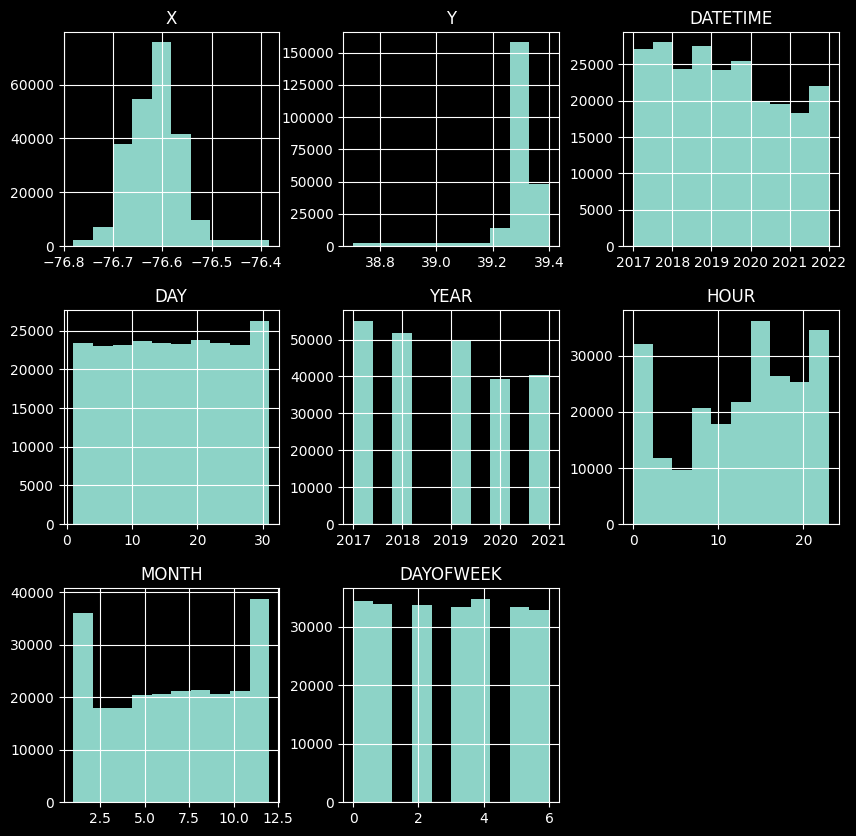

In [96]:
df.hist(figsize = (10, 10))
plt.show()

## Vemos las caracteristicas mas importantes

In [99]:

X = df[['X', 'Y', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'DAYOFWEEK']]
y = df['TARGET']

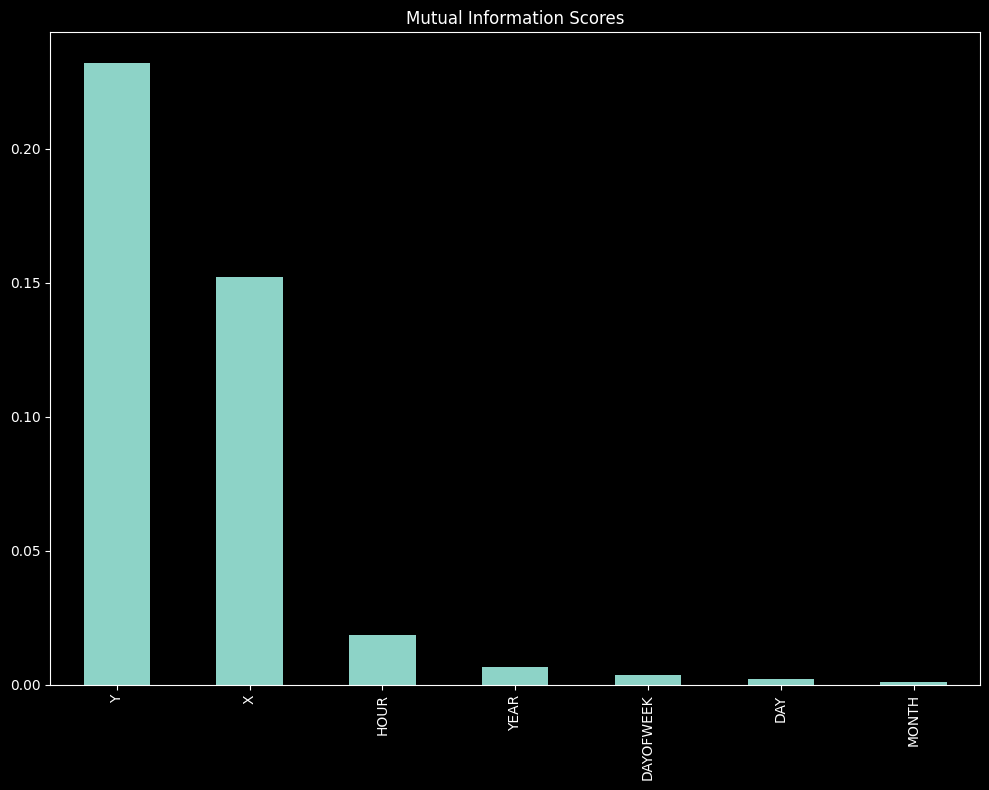

In [105]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
mi_scores.plot.bar()
plt.title('Mutual Information Scores')
plt.tight_layout()
plt.show()

Podemos ver que las caracteristicas mas importantes son `[Y] ` seguida de `[X]`